# Ricorsione

*(Sezioni 5.10, 11.1, 11.2, 11.3, 11.4, 11.7, Errori comuni 11.1, Esempi completi 11.2)*

La *ricorsione* è un meccanismo di calcolo che consiste nel risolvere un problema risolvendo dei sottoproblemi simili a quello originale ma più semplici. Si configura generalmente come una alternativa alla *iterazione* (cicli).

## Fondamenti della ricorsione

Consideriamo il problema di calcolare il fattoriale di un numero. Ricordiamo che il fattoriale del numero (intero) *n* è il prodotto dei numeri da 1 fino ad *n*, e si scrive *n!*. Così:
* 1! = 1
* 2! = 1*2 = 2
* 3! = 1*2*3 = 6
* 4! = 1*2*3*4 = 24

e così via. Inoltre, per convenzione,
* 0! = 1

Sappiamo già risolvere questo problema usando l'iterazione. Ad esempio:

In [1]:
def fattoriale_iterativo(n):
    fact = 1
    for i in range(1, n+1):  # da 1 fino ad n
        fact *= i
    return fact

In [2]:
fattoriale_iterativo(4)

24

Tuttavia, c'è un altro modo di vedere il problema. Consideriamo ad esempio $4! = 1 \cdot 2 \cdot 3 \cdot 4$. Ma $\cdot 1 \cdot 2 \cdot 3$ non è altre che il fattoriale 3, cioè $3!$. Dunque $4! = 3! \cdot 4$. In generale, $n! = 1 \cdot 2 \cdot 3 \cdots (n-1) \cdot n$ Ma $1 \cdot 2 \cdot 3 \cdots (n-1)$ non è altro che $n!$, quindi $n! = (n-1)! \cdot n$ o, come risulta più comodo:

$$n! = n \cdot (n-1)!$$

Dunque, è possibile calcolare il fattoriale di n determinando prima il fattoriale di n-1, qundi moltiplicando il risultato per n. Potremmo provare a implementare quanto descritto in Python, come segue:

In [3]:
def fattoriale_ricorsivo(n):
    return n * fattoriale_ricorsivo(n-1)

Purtroppo, se provo a calcolare il fattoriale di qualunque numero, la funzione genera un errore: *maximum recursion depth exceeded*.

In [4]:
fattoriale_ricorsivo(6)

RecursionError: maximum recursion depth exceeded

Parleremo di questo errore in un altro momento, sta di fatto che c'è un problema. Il punto è che per calcolare il fattoriale di n è necessario calcolare quello di n-1, ma per calcolare il fattoriale di n-1 è necessario calcolare il fattoriale di n-2 e così via... in uno "scarica barile" senza fine. Notare che lo stesso problema avremmo anche noi esseri umano se volessimo calcolare il fattoriale di 4 usando l'equazione $n! = (n-1)! \cdot n$. Avremmo infatti

$$4! = 4 \cdot 3! = 4 \cdot 3 \cdot 2! = 4 \cdot 3 \cdot 2 \cdot 1! = 4 \cdot 3 \cdot 2 \cdot 1 \cdot 0! = 4 \cdot 3 \cdot 2 \cdot 1 \cdot 0 \cdot -1! =  4 \cdot 3 \cdot 2 \cdot 1 \cdot 0 \cdot -1 \cdot -2! = \ldots$$

Ogni volta rimpiazziamo $n!$ con la sua definizione, ma questo non ci porta mai a nulla. Occorre inserire nella definizione di fattoriale quello che si chiama un **caso base** della ricorsione, ovvero determinare uno o più valori di n per cui la funzione non è definita in termini di se stessa, ma ad esempio con un valore fisso. Visto che il fattoriale di numero negativi non ha senso, è utile prendere il caso base per $n=0$, per cui la definizione matematica di fattoriale diventa:

$$\begin{cases}
0! = 1 &  \\
n! = n \cdot (n-1) & \text{se $n > 0$}
\end{cases}
$$

Se adesso usiamo questa definizione per calcolare il fattoriale di 4, abbiamo:
$$4! = 4 \cdot 3! = 4 \cdot 3 \cdot 2! = 4 \cdot 3 \cdot 2 \cdot 1! = 4 \cdot 3 \cdot 2 \cdot 1 \cdot 0!$$
ma adesso per $0!$ non usiamo la definizione $0!=1$, e otteniamo
$$4! = 4 \cdot 3! = 4 \cdot 3 \cdot 2! = 4 \cdot 3 \cdot 2 \cdot 1! = 4 \cdot 3 \cdot 2 \cdot 1 \cdot 0! = 4 \cdot 3 \cdot 2 \cdot 1 \cdot 1 = 24$$

Se adesso proviamo ad implementare questa definizione di fattoriale in Python, otteniamo:

In [5]:
def fattoriale_ricorsivo(n):
    if n == 0:
        return 1
    else:
        return n * fattoriale_ricorsivo(n-1)

E adesso funziona!!

In [7]:
fattoriale_ricorsivo(4)

24

La funzione *fattoriale* che abbiamo scritto è una **funzione ricorsiva**, perche al suo interno richiama se stessa, con una argomento più piccolo di quello di partenza.

### Esecuzione passo passo

Mostriamo ora le tracce di esecuzione passo-passo di fattoriale ricorsivo. Per rendere più comprensibile l'esecuzione passo-passo, modifichiamo leggermente la funzione in modo da separare la `return` del caso ricorsivo, dal calcolo del prodotto. Nel frattempo, le abbiamo anche cambiato nome per non essere troppo ingombrante:

In [64]:
def fattoriale(n):
    if n == 0:
        return 1
    else:
        risultato = n * fattoriale(n-1)
        return risultato

Vediamo inizialmente le tracce di esecuzione di `fattoriale(0)`, `fattoriale(1)` e `fattoriale(2)`. Notare che queste tracce di esecuzione sono semplificate: quando avviene una chiamata di funzione durante l'esecuzione, non tracciamo passo-passo anche quest'ultima, ma ne consideriamo direttamente il risultato, che conosciamo già dagli esempi calcolati in precedenza.

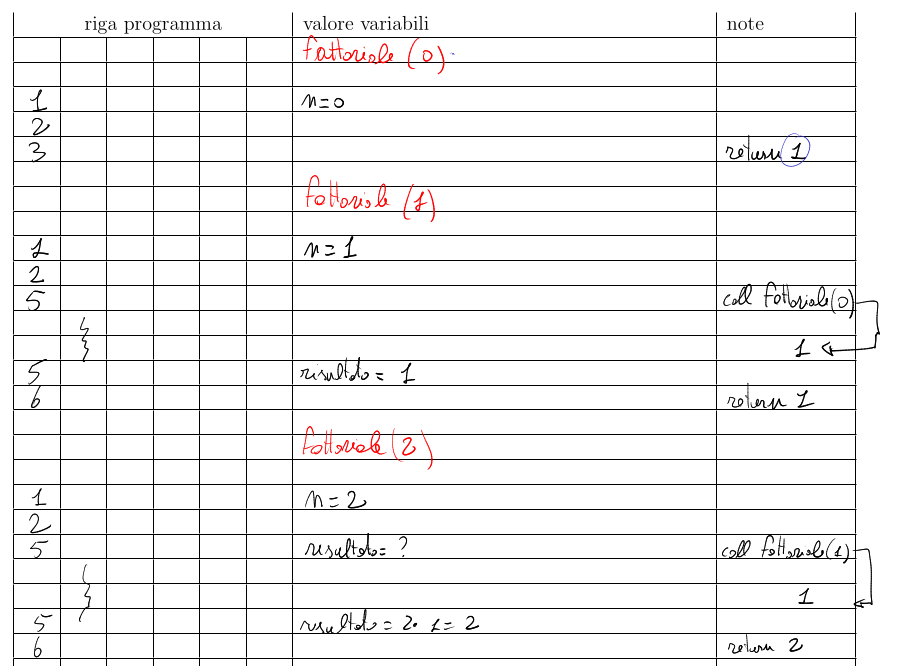

Vediamo invece qui sotto l'esecuzione passo passo di `fattoriale(3)` in tutti i dettagli, compresa l'esecuzione delle chiamate ricorsive (si chiamano in questo modo le chiamate di una funzione a se stessa).

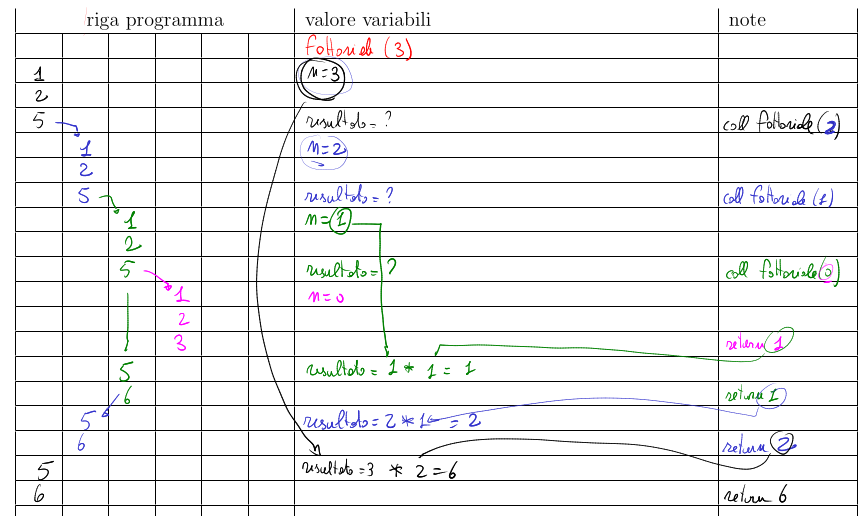

## Altri  esempi di ricorsione sugli interi

### Stampa di triangoli

Consideriamo una funzione che visualizza un triangolo rettangolo formato da asterischi, come abbiamo già visto in passato.

In [8]:
def triangolo_iterativo(n):
    """
    Disegna un triangolo rettangolo formato da `n` righe.
    """
    for i in range(1, n+1):
        print("*" * i)

triangolo_iterativo(5)

*
**
***
****
*****


Notare che questo triangolo è formato da un triangolo più piccolo composto da 4 righe (come sarebbe l'outpit di `triangolo_iterativo(4)`) più una riga finale di 5 asterischi. In generale, un triangolo di `n` righe si può pensare come composto da uno di `n-1` righe con l'aggiunta finale di una riga di `n` asterischi. Come nel caso del fattoriale, ci serve un caso base, che potrebbe essere il caso del triangolo con una sola riga.

Questa è l'idea che da origine alla soluzione ricorsiva.

In [9]:
def triangolo_ricorsivo(n):
    if n == 1: # caso base
        print("*")
    else:      # caso ricorsivo
        triangolo_ricorsivo(n-1)
        print("*" * n)

Quando la funzione `triangolo_ricorsivo(5)` viene chiamata, essa causerà in cascata la chiamata di `triangolo_ricorsivo(4)` quindi di `triangolo ricorsivo(3)`, `triangolo ricorsivo(2)` e così via. Perché questa catena di chiamate si arresti, è necessario prevedere un *caso base* (in questo caso qundo n=1) che viene risolto direttamente, senza causare una ulteriore chiamata di funzione.

Vediamo più in dettaglio le tracce di esecuzione di `triangolo_ricorsivo(1)`, `triangolo_ricorsivo(2)` e `triangolo_ricorsivo(3)`. Notare che queste tracce di esecuzione sono semplificate: quando avviene una chiamata di funzione durante l'esecuzione, non tracciamo passo-passo anche quest'ultima, ma ne consideriamo direttamente il risultato (in questo caso l'output) che conosciamo già dagli esempi già calcolati.

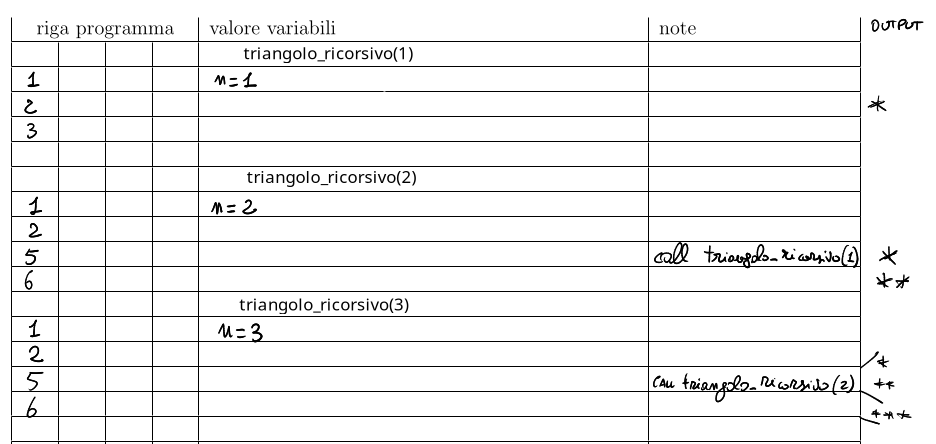

Vediamo invece qui sotto l'esecuzione passo passo di `triangolo_ricorsivo(3)` in tutti i dettagli, compresa l'esecuzione delle chiamate ricorsive (si chiamano in questo modo le chiamate di una funzione a se stessa).

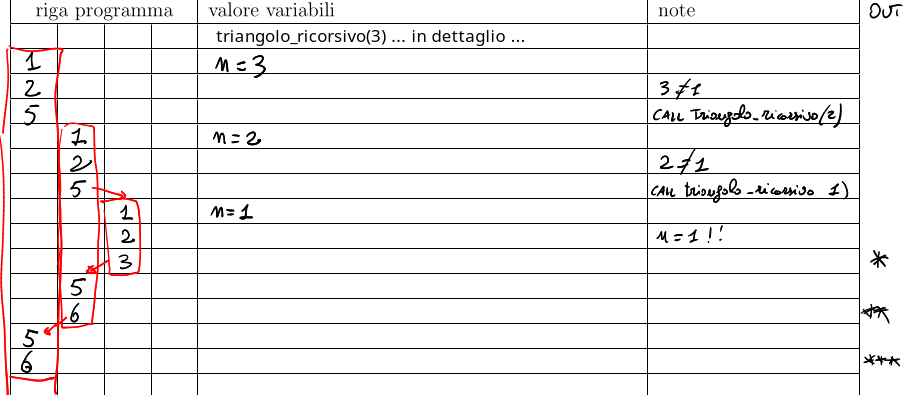

Notare che per certi problemi potrebbe esserci una certa variabilità nel caso base. Di solito il caso base della ricorsione è il valore più piccolo per cui ha senso chiamare la funzione. Nel caso del triangolo, potrebbe anche avere senso chiamarla con n = 0 (nel senso che non si vuole disegnare proprio nulla). In questo caso, al funzione si può riscrivere così:

In [10]:
def triangolo_ricorsivo2(n):
    if n == 0: # caso base
        pass
    else:      # caso ricorsivo
        triangolo_ricorsivo(n-1)
        print("*" * n)

triangolo_ricorsivo2(5)

*
**
***
****
*****


### Somma dei numeri da 1 fino ad n

Consideriamo adesso la funzione che prende in input un numero `n` e restituisce la somma dei numeri da 1 fino  ad `n`. Questo esempio è praticamente analogo a quello del fattoriale, sono con la somma invece del prodotto.

In [11]:
def somma_iterativa(n):
    """
    Restituisce la somma 1 + 2 + 3 + ... + n
    """
    sum = 0
    for i in range(1, n+1):
        sum += i
    return sum

somma_iterativa(5)

15

Come nel caso del fattoriale, possiamo notare che per calcolare la somma dei numeri da 1 fino ad n, possiamo prima calcolare la somma dei numeri da 1 fino ad `n-1`, e poi aggiungere `n`. Questa idea si tramuta nella seguente funzione:

In [12]:
def somma_ricorsiva(n):
    if n == 1:  # caso base
        return 1
    else:       # caso ricorsivo
        x = somma_ricorsiva(n-1)
        return x + n

somma_ricorsiva(5)

15

Come per il precedente programma, vediamo l'esecuzione passo-passo (ma sorvolando sulle chiamate ricorsive) per `somma_ricorsiva(1)`, `somma_ricorsiva(2)` e `somma_ricorsiva(3)`.

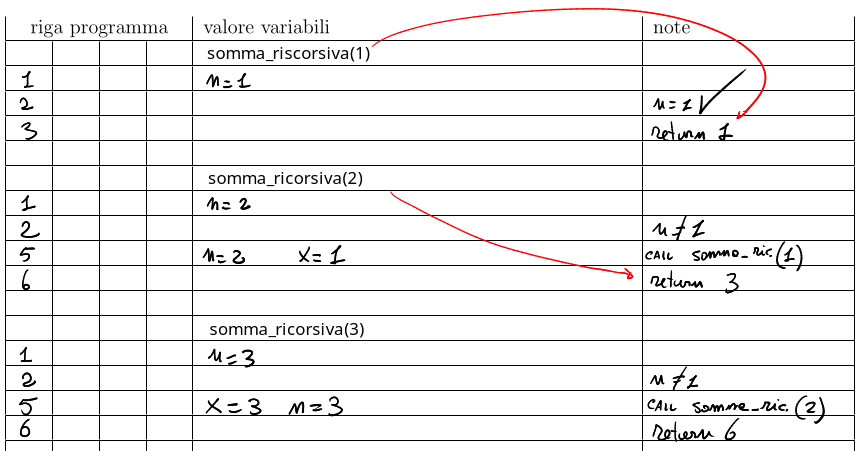

E poi aggiungiamo l'esecuzione passo-passo dettagliata con tutte le chiamate ricorsive per `somma_ricorsiva(3)`.

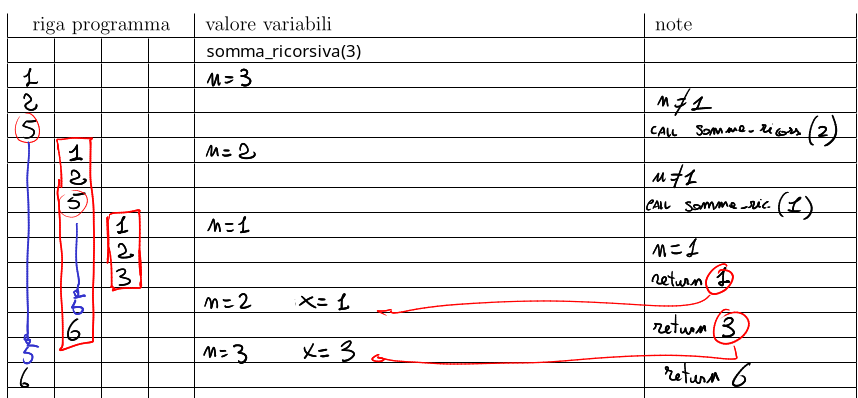

## Ricorsione su altri tipi di dato

Non siamo limitati a usare la ricorsione su funzioni i cui argomenti sono interi. Qualunque tipo di dato si può usare ai fini della ricorsione, purché ci sia un modo di misurare la complessità degli oggetti di questo tipo. Il caso ricorsivo dovrò richiamare la funzione su valori più semplici rispetto all'argomento in input. Per gli interi la misura di complessità è il numero stesso, e infatti le funzioni ricorsive viste finora richiamavano se stesse su un input ridotto di 1. Per le stringhe e le liste, invece, una buona misura della complessità è la lunghezza.

### Esempio sulle liste: somma degli elementi di una lista

Supponiamo di voler scrivere una funzione che calcola la somma degli elementi di una lista. La versione iterativa che abbiamo visto più volte è questa:

In [13]:
def somma_lista_iterativa(l):
    somma = 0
    for x in l:
        somma += x
    return somma

somma_lista_iterativa([10,20,30,40])

100

Vogliamo scrivere una funzione ricorsiva che svolge lo stesso compito. In questo caso, l'idea è che per calcolare la somma degli elementi di una lista, possiamo spezzare la lista nel suo primo elemento e in quelli seguenti: per calcolare la somma degli elementi di una lista come `[10, 20, 30, 40]` possiamo prima calcolare la somma di `[20, 30, 40]` (dal secondo elemento in poi), e poi aggiungere il primo elemento (10 in questo caso). Facendo così, richiamiamo la funzione sulla lista `[20, 30, 40]`, poi su `[30, 40]` e così via, fino ad arrivare alla lista vuota. Quest'ultima è un ottimo punto per il caso base. Otteniamo quindi:

In [14]:
def somma_lista_ricorsiva(l):
    if l == []:
        return 0
    else:
        return l[0] + somma_lista_ricorsiva(l[1:])

somma_lista_ricorsiva([10, 20, 30, 40])

100

### Esempio sulle stringhe: reverse

Come esempio sulle stringhe, proviamo ad implementare ricorsivamente la funzione che presa una stringa restituisce la sua inversa (letta da destra a sinistra). Dobbiamo impostarla in maniera ricorsiva. Supponiamo di avere una stringa come `Ciao`. Possiamo pensare di separare il primo carattere (`C`) e il resto della lista (`iao`). A questo punto calcoliamo il reverse della seconda lista (`oai`) e aggiungiamo alla fine il primo carattere che abbiamo estratto (`oaiC`). Il caso base è ovviamente la stringa vuota, che letta al contrario è sempre una stringa vuota.

In [15]:
def reverse_ricorsiva(s):
    if s == "":
        return ""
    else:
        return reverse_ricorsiva(s[1:]) + s[0]

reverse_ricorsiva("Ciao")

'oaiC'

### Esempio sulle stringhe: determinare se una stringa è palindroma (approfondimento)

Il caso base in questo problema sono le stringhe corte, quelle di un carattere o meno. Queste sono sicuramente palindrome. Per il caso ricorsivo, possiamo controllare il primo e ultimo carattere: se sono diversi, sicuramente la stringa non può essere palindroma, ma se sono uguali, allora possiamo:
  1. togliere questi caratteri dalla stringa
  2. determinare la nuova stringa ottenuta (che è più corta di quella di partenza) è palindroma
  3. la stringa originale è palindroma se e solo se questa ridotta lo è

Notare che questa funzione è pià complessa delle precedenti, anche perché l'oggetto su cui applicare la ricorsione non si ottiene togliendo solo la lettera iniziale, ma sia quella iniziale che quella finale. Questa idea si implementa nella seguente funzione.

In [21]:
def palindroma(s):
    """
    Restituisce True se s è palindroma, False altrimenti
    """
    if len(s) <= 1:      # caso base
        return True
    elif s[0] != s[-1]:
        return False
    else:
        return palindroma(s[1:len(s)-1])

Si noti l'uso di `s[1:len(s)-1]` per estrarre la sottostringa di `s` che inizia alla posizione 1 e termina alla posizione `len(s)-2`, ovvero quella ottenuta eliminando il primo e l'ultimo elemento.

In [17]:
palindroma("anna")

True

In [18]:
palindroma("ala")

True

In [ ]:
palindroma("alce")

Qui sotto vediamo l'esecuzione passo passo della chiamata `palindroma("asta")`.

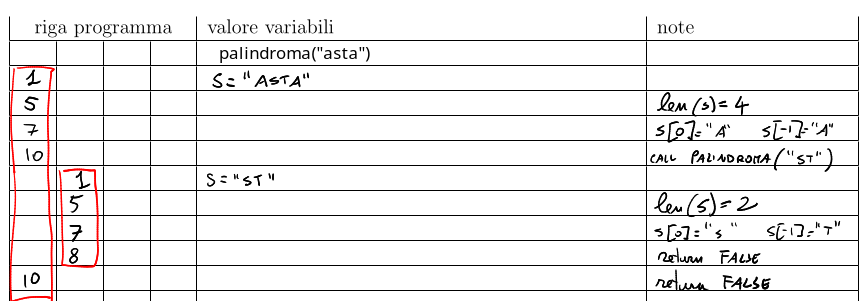

Si noti che con l'input `asta` non arriviamo al caso base, ma ci fermiamo quando confrontiamo `s` con `t`. In generale, nella funzione `palindroma` il caso base si raggiunge solo se effettivamente la stringa in input è palindroma, altrimenti ci si ferma prima.

## Problemi della ricorsione

### Massimo livello di ricorsione

Notare che Python non è un linguaggio particolarmente ottimizzato per le funzioni ricorsive. Le funzioni ricorsive, se non ottimizzate corettamente, cosa che richiedono il lavoro congiunto del compilatore e di chi scrive il codice, sono molto più dispendiose di quelle iterative. Per questo motivo, Python ha un limite massimo al numero di chiamate ricorsive che è possibile effettuare, di default pari a qualche migliaio. Se si supera questo limite, viene restituito un errore.

In [25]:
somma_iterativa(4000)

8002000

In [27]:
somma_ricorsiva(4000)

RecursionError: maximum recursion depth exceeded

Questo errore è causato dal fatto che c'è un limite alla dimensione della *pila dei record di attivazione* (quello che abbiamo chiamato anche *stack* in altri contesti). Siccomi ogni chiamata ricorsiva crea un nuovo record di attivazione, c'è un limite al numero di vole che una funzione può chimare se stessa.

### Efficienza delle funzioni ricorsive e funzioni ausiliarie

Vorremmo confrontare le prestazioni delle funzioni `somma_lista_iterativa` e `somma_lista_ricorsiva`. Un tale confronto andrebbe fatto con liste molto grandi, ma i limiti alla dimensione della pila dei recordi di attivazione in Python ci costringolo a considerare liste di circa 2000 posizioni. Infatti:

In [28]:
# La seguente istruzione fallisce
somma_lista_ricorsiva([1] * 3000)

RecursionError: maximum recursion depth exceeded

In realtà, anche se non lo useremo, è possibile aumentare la dimensione dell call stack in Python, con la funzione `setrecursionlimit` del modulo `sys`. Notare che impostare un limite troppo grande potrebbe causare un crash dovuto all'esaurimento della memoria.

In [29]:
# Fissa il limite a 1000000 per la dimensione del call stack

from sys import setrecursionlimit
setrecursionlimit(1_000_000)

In [30]:
# Adesso la stessa istruzione di prima ha successo
somma_lista_ricorsiva([1] * 3000)

3000

Proviamo quindi a determinare il tempo di esecuzione della versione ricorsiva e iterativa, prima con una lista lunga 1000, poi una lunga 2000.

In [32]:
l1 = [1] * 1000

Usiamo una funzione che hanno i notebook che ci consentone di misurare il tempo di esecuzione di una cella. Basta inserire `%%timeit` come prima riga di una cella e VSCode proverà a calcolare il tempo di esecuzione della cella, facendo delle esecuzioni ripetute ed estraendo il tempo medio.

In [33]:
%%timeit
somma_lista_iterativa(l1)

12.9 μs ± 256 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [34]:
%%timeit
somma_lista_ricorsiva(l1)

632 μs ± 1.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [35]:
l2 = [1] * 2000

In [36]:
%%timeit
somma_lista_iterativa(l2)

27.5 μs ± 635 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [37]:
%%timeit
somma_lista_ricorsiva(l2)

2.21 ms ± 41.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Notiamo due cose:
  1. `somma_lista_ricorsiva` è più lenta di `somma_lista_ricorsiva`. Questo è inevitabile:  per far funzonare la ricorsione, l'interprete Python deve salvare varie informazioni e deve mantenere la pila dei record di attivazione.
  2. Raddoppiando la dimensione della lista, il tempo che impiega  `somma_lista_iterativa` raddoppia, ma quello che ci mette `palindroma_ricorsiva` quasi quadruplica. Questo perché la funzione  `somma_lista_ricorsiva` , ogni volta che richiama se stessa, deve prendere la lista con cui è stata chiamata e generare una nuova lista in cui ha tolto il primo elemento. La creazione di questa lista richiede del tempo, perché quella vecchia va copiata in una nuova zona di memoria (tranne, ovviamente, l'elemento iniziale).

Per risolvere quest'ultimo problema modifichiamo la funzione `somma_lista_ricorsiva` in modo che prenda un parametro aggiuntivo `first`. L'idea è che la nuova funzione non fa la somma di tutta la lista, ma solo degli elementi a partire da quelli in posizione `first`. In questo modo, quando dobbiamo richiamare la funzione ricorsivamente, non è necessario estrarre un sottolista, ma possiamo semplicemente modificare il punto di partenza tramite il parametro `first`.

In [38]:
def somma_lista_ricorsiva_aux(l, first):
    """
    Restituisce la somma degli elementi di `l`, da quello in  posizione `first` in poi.
    """
    if first >= len(l):       # caso base, non c'è niente da sommare
        return 0
    else:
        # invece di richiamare "somma_lista_ricorsiva_aux" su una porzione di "l" la
        # richiamiamo su "l" stessa, ma restingiamo il campo di applicazione
        # incrementando la posizione first.
        return l[first] + somma_lista_ricorsiva_aux(l, first+1)

Quando richiamiamo `somma_lista_ricorsiva_aux` dobbiamo ricordarci di fornire anche il parametro `first`, pari normalmente a `0`.

In [39]:
somma_lista_ricorsiva_aux([1,2,3,4],0)

10

Poiché usare `somma_lista_ricorsiva_aux` in questo è scomodo, spesso si definisce una funzione addizionale che fa da *interfaccia* tra `somma_lista_ricorsiva_aux` e il programmatore. Il programmatore chiama questa funzione di interfaccia fornendo solo i parametri veramente necessari, gli altri vengono calcolati automaticamente.

In [41]:
def somma_lista_ricorsiva2(l):
    # richiamo la funzione palindroma_ricorsiva_aux con i valori opportuni
    return somma_lista_ricorsiva_aux(l, 0)

somma_lista_ricorsiva2([1,2,3,4])

10

Misuriamo i tempi di esecuzione della nuova versione.

In [42]:
%%timeit
somma_lista_ricorsiva2(l1)

92.8 μs ± 894 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [43]:
%%timeit
somma_lista_ricorsiva2(l2)

188 μs ± 1.71 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Notiamo che:
  1. Anche `somma_lista_ricorsiva2` è più lenta di `somma_lista_iterativa`, ma meno rispetto a prima. 
  2. Raddoppiando la dimensione della lista in input, il tempo di esecuzione di `somma_lista_ricorsiva2` raddoppia, comportandosi bene, come la funzione iterativa, e non come quella ricorsiva non ottimizzata iniziale.

### Ripetizione degli stessi sotto-problemi

Proviamo a scrivere una funzione che calcola i numeri della [successione di Fibonacci](https://it.wikipedia.org/wiki/Successione_di_Fibonacci). I numeri di fibonacci sono definiti in maniera ricorsiva come segue:
$$
\begin{cases}
fib(0) = 0 \\
fib(1) = 1 \\
fib(n) = fib(n-1) + fib(n-2) & \text{se $n > 1$} 
\end{cases}
$$

Ovvero, a parte il numero 0 di fibonacci ed il numero 1, tutti gli altri numeri di Fibonacci sono ottenutio sommanco i due numeri di Fibonacci precedenti. La trasposizione di questa definizione sotto forma di programma Python è immediata.

In [45]:
def fib_rec(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib_rec(n-1) + fib_rec(n-2)

Proviamola:


In [48]:
fib_rec(10)

55

Notare che, a differenza dei casi visti fin'ora, la funzione `fib_rec` ha due chiamate ricorsive al suo interno, e non una sola.

Questa invece è la versione iterativa. Potete trovarla descritta in dettaglio nelle soluzioni dell'Esercizio 7 del 24 ottobre 2024.

In [51]:
def fib_iter(n):
    fib_prev = 0
    fib_curr = 1
    for i in range(2, n+1):
        fib_new = fib_curr + fib_prev
        fib_prev = fib_curr
        fib_curr = fib_new
    return fib_curr

fib_iter(10)

55

Si noti che, in questo caso, la versione ricosiva è pià comprensibile di quella iterativa.

Misuriamo quanto ci mette `fib_iter` a calcolare il decimo numero di Fibonacci.

In [52]:
%%timeit
fib_iter(10)

258 ns ± 2.48 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Se aumentiamo di uno il parametro in input, il tempo di esecuzione cambia di poco. Questo perché, nel ciclo che implementa la funzione `fib_iter`, faremo una sola iterazione in più rispetto al caso precedente.

In [53]:
%%timeit
fib_iter(11)

226 ns ± 1.18 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Se raddoppiamo il numero il parametro da `10` a `20`, il tempo di esecuzione circa raddoppia.

In [54]:
%%timeit
fib_iter(20)

403 ns ± 1.89 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Questo perché la complessità della funzione `fib_iter` è dell'ordine di O(n): il numero di operazioni che compie (ad esepio, il numero di moltiplicazioni) è proporzionale ad `n`. Parleremo dell'ordine di complessità in una delle prossime lezioni, ma intanto inizio ad introdurre qualche notazione ogni tanto.

Con la versione ricorsiva, invece, accade qualcosa di molto più drastico. Cominciamo col caso in cui l'input è 10. Ovviamente la versione ricorsiva è più lenta di quella iterativa, ma questo non ci stupisce.

In [55]:
%%timeit
fib_rec(10)

4.5 μs ± 15.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Ma se aumentiamo di uno il parametro in input, da 10 a 11, il tempo di esecuzione non aumenta di poco, bensì quasi raddoppia.

In [56]:
%%timeit
fib_rec(11)

7.24 μs ± 61.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [57]:
%%timeit
fib_rec(12)

11.8 μs ± 48.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Perché questo notevole peggioramente nel passare da 10 a 11 e da 11 a 12 ? Qui non ci sono operazioni su liste come nell'esempio precedente, quindi non si capisce da scaturisce questo comportamento.

Notare che calcolare il 40° numero di fibonacci con la funzione ricorsiva richiede vari secondi, mentre con la versione iterativa è istantaneo.

In [58]:
fib_rec(40)

102334155

In [59]:
fib_iter(40)

102334155

Per capire come mai la versione ricorsiva è così più lenta di quella iterativa, si può esaminare il seguente grafico, che mostra tutte le chiamate di funzioni effettuate per `fib_rec(4)`.

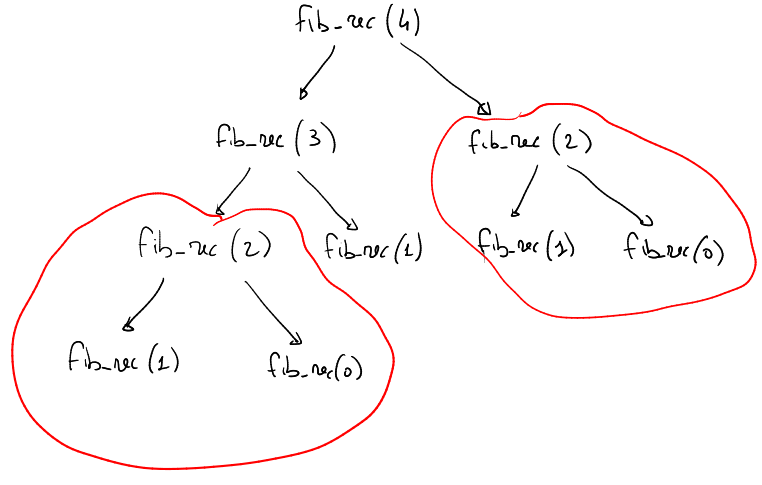

Si nota come `fib_rec(0)`, `fib_rec(1)` e `fib_rec(2)` vengono richiamate ripetutamente. Tutta la parte evidenziata in rosso è ripetuta esattamente due volte. La cosa è ancora più evidente quando si considera la chiamata a `fib_rec(5)`.

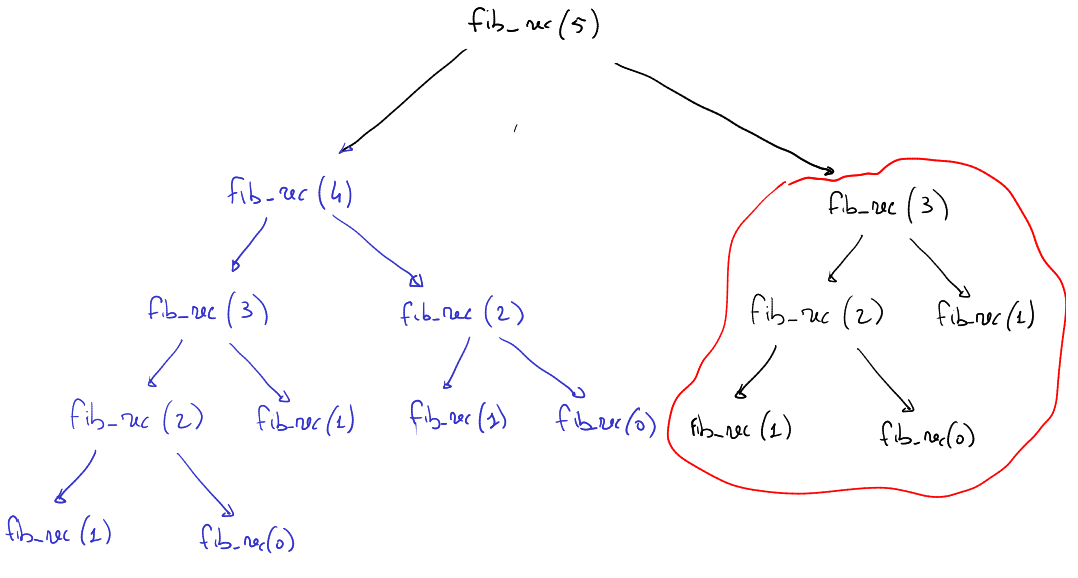

La parte in blu è quella relativa a `fib_rec(4)`. Si vede come passare da `fib_rec(4)` a `fib_rec(5)` non causa soltanto una chiamata ricorsiva in più ma tutto il blocco di chiamate in nero. In particolare, la computazione necessaria per determina `fib_rec(3)`, evidenziate in rosso, viene ripetuta di nuovo nonostante sia già stata eseguita per calcolare `fib_rec(4)`.

Questa continua ripetizione delle stesse computazioni causa l'enorme complessità computazionale di `fib_rec(n)`.

## Le torri di Hanoi

Da tutte queste spiegazioni, sembrerebbe lecito concludere che la ricorsione è meglio non usarla. Il fatto è che tutti gli esempi fatti fin'ora, per essere semplici, sono un po' artificiosi: sono dei casi in cui l'iterazione si comporta molto meglio della ricorsione. Ma ci sono alcune situazioni in cui scrivere un programam ricorsivo è **MOLTO** più semplice di scriverne uno iterativo, a costo di un incremento limitato del tempo di esecuzione.

Già con il programma dei numeri di Fibonacci abbiamo visto che il programma ricorsivo era più semplice di quello iterativo, solo che lì l'efficienza della soluzione ricorsiva era problematica, perché lo stesso sottoproblema veniva risolto più volte. La maggior parte delle situazioni dove la ricorsione è utile le vedrete al corso di *Programmazione e algoritmi 2*. In questa lezione presento un rompicapo che ha un facile soluzione ricorsiva (mentre non si capisce come approcciarlo in maniera iterativa).

Consideriamo il caso del gioco delle [torri di Hanoi](https://it.wikipedia.org/wiki/Torre_di_Hanoi). Secondo Wikipedia:
<blockquote>
La Torre di Hanoi   è un rompicapo matematico composto da tre paletti e un certo numero di dischi di grandezza decrescente, che possono essere infilati in uno qualsiasi dei paletti. Il gioco inizia con tutti i dischi incolonnati su un paletto in ordine decrescente, in modo da formare un cono. Lo scopo del gioco è portare tutti i dischi su un paletto diverso, potendo spostare solo un disco alla volta e potendo mettere un disco solo su un altro disco più grande, mai su uno più piccolo. 
</blockquote>

Potete trovare una versione on-line del gioco su https://www.geogebra.org/m/fN74ZAsj

Il nostro obiettivo è scrivere una funzione che, preso un numero `n` in input, stampi l'elenco delle mosse da fare per spostare `n` dischi dal piolo 1 al piolo 3. Scrivere un programma che stampi questo elenco può sembrare estremamente complicato. Tuttavia, supponiamo che ci sia un nostro amico che sa come spostare `n-1` dischi da un piolo ad un altro. Allora, per spostare `n` dischi dal piolo 1 al piolo 3 possiamo procedere come segue:
  1. chiediamo all'amico di spostare `n-1` dischi  dal piolo 1 al 2;
  2. spostiamo l'ultimo disco rimastro nel piolo 1 (il disco più grande di tutti) al piolo 3;
  3. chiediamo di nuovo al nostro amico di spostare `n-1` dischi, questa volta dal piolo 2 al piolo 3.

Possiamo trasformare la sequenza di punti qui sopra nel caso ricorsivo di una funzione che risolve il nostro problema. Ma dobbiamo generalizzare la nostra funzione facendogli pendere due ulteriori parametri che sono il piolo di partenza e il piolo di arrivo dello spostamento. Come caso base consideriamo il problema in cui vogliamo spostare zero pioli: in questo caso, ovviamente, l'elenco degli spostamenti da compiere è vuoto.

In [60]:
def hanoi(n, from_peg, to_peg):
    """
    Stampa la sequenza di operazioni necessarie per spostare "n" dischi dal piolo "from_peg" al piolo "to_peg".
    I valori di "from_peg" e "to_peg" devono essere diversi tra di loro, e possono valere 1, 2 o 3.
    """
    if n == 0:  # caso base, nulla da stampare
        return
    # from_peg e to_peg sono i pioli di partenza e destinazione (devono essere diversi).
    # quando chiamiamo ricorsivamente la funzione hanoi, dobbimo spostare n-1 dischi dal
    # piolo from_peg ad un piolo temporaneo, e poi dal piolo temporaneo a to_peg. Il piolo
    # temporaneo è quello diverso sia da from_peg che da to_peg. L'istruzine if che segue
    # determina il piolo temporaneo.
    if from_peg != 1 and to_peg != 1:
        tmp_peg = 1
    elif from_peg != 2 and to_peg != 2:
        tmp_peg = 2
    else:
        tmp_peg = 3
    # prima chiamata ricorsiva
    hanoi(n-1, from_peg, tmp_peg)
    # stampa l'istruzione per spostare l'ultimo piolo da from_peg a to_peg
    print(from_peg, "->", to_peg)
    # seconda chiamata ricorsiva
    hanoi(n-1, tmp_peg, to_peg)

Poiché denotiamo i tre pioli con i numeri 1, 2 e 3, osserviamo che:
  1. la somma di questi tre numeri fa 6
  2. se calcoliamo `6 - from_peg - to_peg` otteniamo il piolo temporaneo da usare, al posto dell'if multiplo di prima.

Usando questo metodo per calcolare `tmp_peg` otteniamo la seguente.

In [61]:
def hanoi(n, from_peg, to_peg):
    """
    Stampa la sequenza di operazioni necessarie per spostare
    "n" dischi dal piolo "from_peg" al piolo "to_peg".
    """
    if n == 0:  # caso base, nulla da stampare
        return
    # determina il piolo temporaneo
    tmp_peg = 6 - from_peg - to_peg
    # prima chiamata ricorsiva
    hanoi(n-1, from_peg, tmp_peg)
    # stampa l'istruzione per spostare l'ultimo piolo da from_peg a to_peg
    print(from_peg, "->", to_peg)
    # seconda chiamata ricorsiva
    hanoi(n-1, tmp_peg, to_peg)

E queste sono le istruzioni per risolvere il problema delle torri di Hanoi con 4 dischi.

In [62]:
hanoi(4, 1, 3)

1 -> 2
1 -> 3
2 -> 3
1 -> 2
3 -> 1
3 -> 2
1 -> 2
1 -> 3
2 -> 3
2 -> 1
3 -> 1
2 -> 3
1 -> 2
1 -> 3
2 -> 3


**Non è un teorema, ma in linea di massima possiamo affermare che se un funzione ricorsiva richiama se stessa una sola volta, allora è facile scrivere la stessa cosa in maniera iterativa. Ma quando la funzione ricorsiva richiama se stessa più volte, allora la versione iterativa può diventare molto più complessa.**

## Mutua ricorsione

Un caso particolare di ricorsione è quando due o più funzioni si richiamano tra loro a vicenda. Si parla in questo caso di **mutua ricorsione**.

Facciamo solo un esempio di questa tipologia, giusto per dare una idea di cosa si tratti. Consideriamo il semplice problema di determinare se un numero è pari o dispari. Fin'ora l'abbiamo risolto calcolando il resto della divisione per 2. Vediamo adesso un modo alternativo rivorsivo (per nulla efficiente, è solo un esempio a scopo didattico).

Osserviamo che un numero n è pari se e solo se n-1 è dispari. E viceversa, n-1 è dispari se e solo se n è pari. Questa osservazione è la base di una soluzione in cui abbiamo due funzioni che restituiscono un valore di verità, definite come segue:

$$
\begin{cases}
pari(0) = \text{Vero}\\
pari(n) = dispari(n-1) & \text{se n > 0}
\end{cases}
\qquad
\begin{cases}
dipari(0) = \text{Falso}\\
dispari(n) = pari(n-1) & \text{se n > 0}
\end{cases}
$$

In entrambi i casi il valore n = 0 è il caso base, quello che viene risolto direttamente.

In Python otteniamo:

In [2]:
def pari(n):
    if n == 0:
        return True
    else:
        return dispari(n-1)

def dispari(n):
    if n == 0:
        return False
    else:
        return pari(n-1)

pari(3) # esempio di utilizzo

False

Questa è l'esecuzione passo-passo:

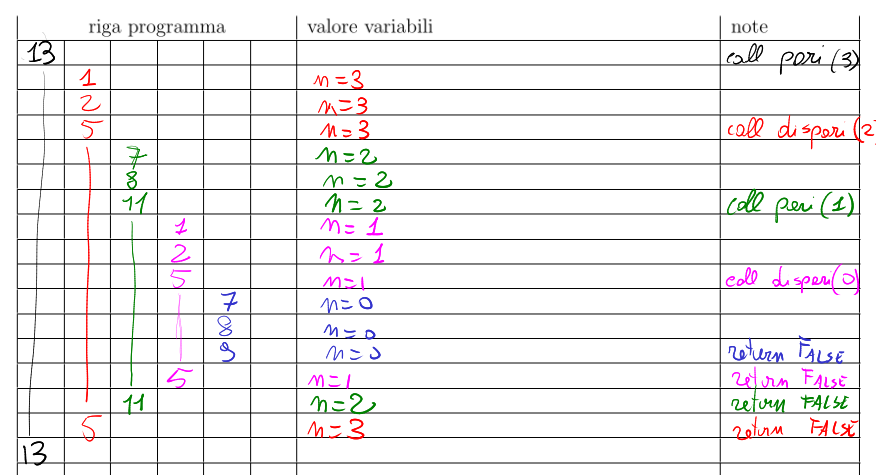